In [1]:
import os
import time
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
from datetime import datetime

In [2]:
#Creating a path to open a browser
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Specify the URL
_url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(_url)

In [4]:
# BeautifulSoup object and parse
_html = browser.html
_soup = bs(_html, 'html.parser')
time.sleep(4)

In [5]:
_rows = _soup.find_all('tr', class_='data-row')
mars_data = []
for _row in _rows:
    td = _row.find_all('td')
    _line = [col.text for col in td]
    mars_data.append(_line)

mars_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [6]:
browser.quit()

In [7]:
df = pd.DataFrame(mars_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp','pressure'])
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [8]:
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
new_df = df.astype({
    'id': 'int', 
    'terrestrial_date': 'datetime64',
    'sol': 'int',
    'ls': 'int',
    'month': 'int',
    'min_temp': 'float',
    'pressure': 'float'

})

In [10]:
new_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

How many months are there on Mars?

In [11]:
print("Answer:", new_df['month'].nunique())

Answer: 12


How many Martian (not Earth) days' worth of data are there in the scraped dataset?

In [12]:
print("Answer:", new_df['sol'].nunique())

Answer: 1867


What are the coldest and warmest months on Mars (at the location of Curiosity)? Obtain the answer by averaging the minimum daily temperature of each month. Plot the results as a bar plot.

In [13]:
month_sort = new_df.set_index('month')
month_sort_group = month_sort.groupby(["month"]).mean()
month_sort_group


,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [14]:
temp_coldest = month_sort_group['min_temp'].min()
temp_warmest = month_sort_group['min_temp'].max()

month_coldest = month_sort_group['min_temp'].idxmin()
month_warmest = month_sort_group['min_temp'].idxmax()

print(f'Month {month_coldest} is the coldest with a temperature of {temp_coldest} degree.')
print(f'Month {month_warmest} is the warmest with a temperature of {temp_warmest} degree.')

Month 3 is the coldest with a temperature of -83.30729166666667 degree.
Month 8 is the warmest with a temperature of -68.38297872340425 degree.


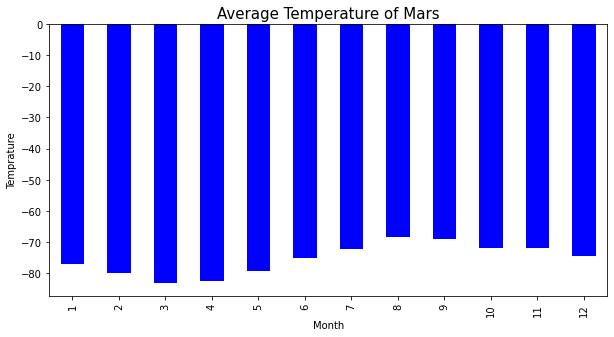

In [15]:
min_temp_avg = month_sort_group['min_temp']
min_temp_avg.plot(kind="bar", figsize=(10, 5), legend = False, color= 'blue')

plt.title(("Average Temperature of Mars"),fontsize=15)
plt.ylabel("Temprature")
plt.xlabel("Month")
plt.show()

Which months have the lowest and highest atmospheric pressure on Mars? Obtain the answer by averaging the daily atmospheric pressure of each month. Plot the results as a bar plot.

In [16]:
pressure_lowest = month_sort_group['pressure'].min()
pressure_highest = month_sort_group['pressure'].max()

month_pressure_lowest = month_sort_group['pressure'].idxmin()
month_pressure_highest = month_sort_group['pressure'].idxmax()

print(f'Month {month_pressure_lowest} has the lowest pressure of {pressure_lowest}.')
print(f'Month {month_pressure_highest} has the highest pressure of {pressure_highest}.')

Month 6 has the lowest pressure of 745.0544217687075.
Month 9 has the highest pressure of 913.3059701492538.


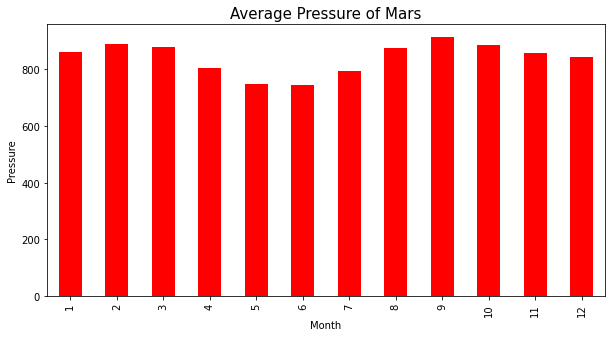

In [17]:
pressure_avg = month_sort_group['pressure']
pressure_avg.plot(kind="bar", figsize=(10, 5), legend = False, color= 'red')


plt.title(("Average Pressure of Mars"),fontsize=15)
plt.ylabel("Pressure")
plt.xlabel("Month")
plt.show()

Approximately how many terrestrial (earth) days are there in a Martian year? In other words, in the time that Mars circles the Sun once, how many days elapse on the Earth? Estimate the result visually by plotting the daily minimum temperature.

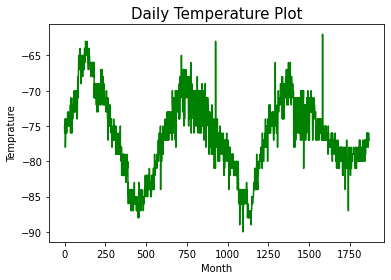

In [18]:
new_df['min_temp'].plot(color= 'green')


plt.title(("Daily Temperature Plot"),fontsize=15)
plt.ylabel("Temprature")
plt.xlabel("Month")
plt.show()

In [19]:
# Based on the daily temperature there are 3 spans. Hence:

terrestrial_day_start = new_df['terrestrial_date'].min()
terrestrial_day_end = new_df['terrestrial_date'].max()

print(f'First terrestrial day is {(terrestrial_day_end-terrestrial_day_start)/3} in a year on Mars.')


First terrestrial day is 673 days 16:00:00 in a year on Mars.


In [20]:
# Export CSV file
new_df.to_csv('marsData.csv')